# 在Wine数据集上应用层次聚类（Hierarchical Clustering）

In [3]:
# 导入必要库
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist
from sklearn.metrics import silhouette_score, adjusted_rand_score

## 1、加载数据集

In [4]:
# 加载Wine数据集
wine = load_wine()
X = wine.data
y = wine.target
feature_names = wine.feature_names
target_names = wine.target_names

# 数据标准化
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## 2、层次聚类模型
使用Ward方法（最小方差法）计算链接

In [8]:
linked = linkage(X_scaled, method='ward')

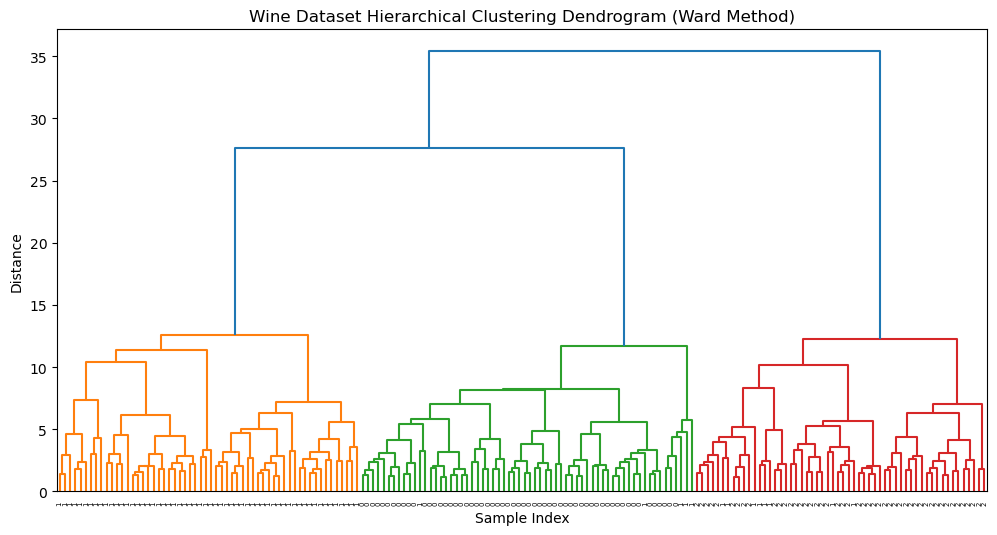

In [9]:
## 3、 绘制树状图
plt.figure(figsize=(12, 6))
dendrogram(linked, orientation='top', labels=y, distance_sort='descending', show_leaf_counts=True)
plt.title('Wine Dataset Hierarchical Clustering Dendrogram (Ward Method)')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

# 根据树状图选择聚类数量（假设选择3类）
n_clusters = 3
model = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
clusters = model.fit_predict(X_scaled)

Silhouette Score: 0.28
Adjusted Rand Index: 0.79


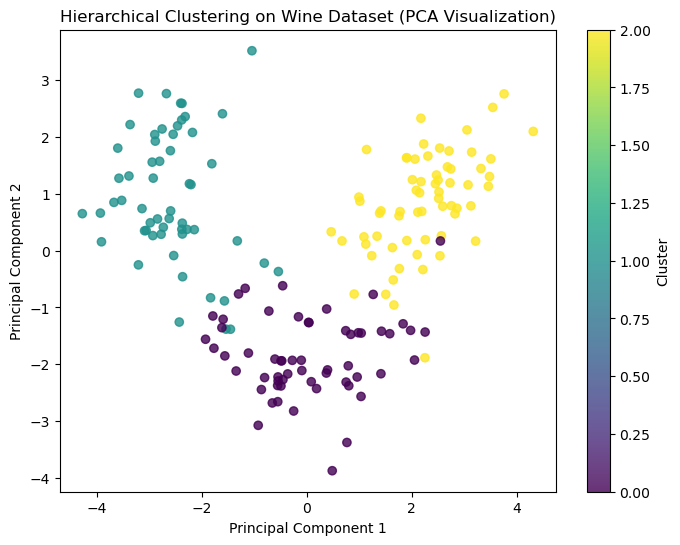

In [10]:
## 3、 评估模型，可视化
# 评估聚类效果（真实标签已知时）
silhouette = silhouette_score(X_scaled, clusters)
ari = adjusted_rand_score(y, clusters)
print(f"Silhouette Score: {silhouette:.2f}")
print(f"Adjusted Rand Index: {ari:.2f}")

# 可视化聚类结果（PCA降维）
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', alpha=0.8)
plt.title('Hierarchical Clustering on Wine Dataset (PCA Visualization)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(scatter, label='Cluster')
plt.show()